# Polars

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [2]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

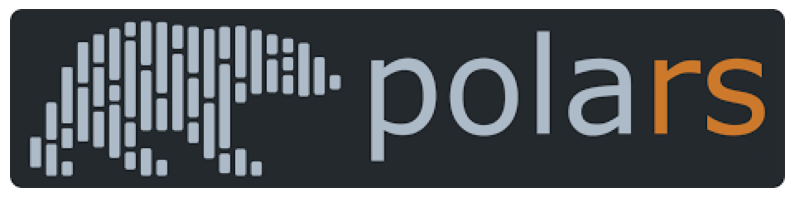

In [3]:
display_img('polars.png', 10, 10)

Polars is a lightning-fast library that can handle data frames significantly more quickly than Pandas.

Now we are going to do a comparison with Pandas.

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install -q polars==0.17.0

In [6]:
import pandas as pd
import polars as pl
import numpy as np
import time

In [7]:
start = time.time()

# 1. Read DF

### i. Pandas

In [8]:
%%time

train_pd = pd.read_parquet('train.parquet')

CPU times: user 3.11 s, sys: 8.68 s, total: 11.8 s
Wall time: 13.6 s


### ii. Polars

In [9]:
%%time

train_pl = pl.read_parquet('train.parquet')

CPU times: user 2.93 s, sys: 2.72 s, total: 5.64 s
Wall time: 9.47 s


# 2. Head

### i. Pandas

In [10]:
%%time

train_pd.head()

CPU times: user 671 µs, sys: 4.06 ms, total: 4.73 ms
Wall time: 13.7 ms


,user,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
0,37460,2,60,8,73,17,61,0.119154,0.792590,0.691714,0.413575,0.568960,0.724723,0.667784,0.621327,0.366504
1,6199,1,30,14,31,65,49,0.871286,0.864431,0.406232,0.685368,0.425132,0.184816,0.307660,0.497363,0.740807
2,67094,2,17,7,18,8,29,0.249553,0.950156,0.081369,0.563896,0.451576,0.778270,0.694566,0.807619,0.916968
3,97776,3,60,16,28,32,43,0.545136,0.463736,0.377657,0.728032,0.537577,0.943349,0.194909,0.684796,0.422892
4,18048,2,42,22,49,53,67,0.606616,0.757299,0.910864,0.187922,0.935874,0.810835,0.152005,0.035744,0.941222


### ii. Polars

In [11]:
%%time

train_pl.head()

CPU times: user 51 µs, sys: 175 µs, total: 226 µs
Wall time: 1.31 ms


user,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
37460,2,60,8,73,17,61,0.119154,0.79259,0.691714,0.413575,0.56896,0.724723,0.667784,0.621327,0.366504
6199,1,30,14,31,65,49,0.871286,0.864431,0.406232,0.685368,0.425132,0.184816,0.30766,0.497363,0.740807
67094,2,17,7,18,8,29,0.249553,0.950156,0.081369,0.563896,0.451576,0.77827,0.694566,0.807619,0.916968
97776,3,60,16,28,32,43,0.545136,0.463736,0.377657,0.728032,0.537577,0.943349,0.194909,0.684796,0.422892
18048,2,42,22,49,53,67,0.606616,0.757299,0.910864,0.187922,0.935874,0.810835,0.152005,0.035744,0.941222


# 3. Agregation operations

In [12]:
nums = [f'num_{i}' for i in range(7, 15 + 1)]
cats = [f'cat_{i}' for i in range(1, 6 + 1)]

In [13]:
nums

['num_7',
 'num_8',
 'num_9',
 'num_10',
 'num_11',
 'num_12',
 'num_13',
 'num_14',
 'num_15']

In [14]:
cats

['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6']

### i. Pandas

In [15]:
%%time

train_pd[nums].min()

CPU times: user 1.26 s, sys: 2.73 s, total: 3.99 s
Wall time: 24 s


num_7     3.447814e-09
num_8     6.758090e-08
num_9     3.387718e-09
num_10    2.832512e-09
num_11    7.106527e-08
num_12    9.356119e-09
num_13    1.062366e-08
num_14    3.810326e-08
num_15    4.786359e-08
dtype: float64

In [16]:
%%time

train_pd[nums].max()

CPU times: user 1.2 s, sys: 879 ms, total: 2.08 s
Wall time: 2.1 s


num_7     1.0
num_8     1.0
num_9     1.0
num_10    1.0
num_11    1.0
num_12    1.0
num_13    1.0
num_14    1.0
num_15    1.0
dtype: float64

In [17]:
%%time

train_pd[nums].mean()

CPU times: user 671 ms, sys: 815 ms, total: 1.49 s
Wall time: 1.57 s


num_7     0.499985
num_8     0.499987
num_9     0.500021
num_10    0.500101
num_11    0.499940
num_12    0.500031
num_13    0.500041
num_14    0.499956
num_15    0.500097
dtype: float64

In [18]:
%%time

train_pd[nums].median()

CPU times: user 2.78 s, sys: 1.03 s, total: 3.81 s
Wall time: 4.52 s


num_7     0.500002
num_8     0.499935
num_9     0.500080
num_10    0.500172
num_11    0.499910
num_12    0.500038
num_13    0.500084
num_14    0.499906
num_15    0.500116
dtype: float64

In [19]:
%%time

train_pd[nums].std()

CPU times: user 1.12 s, sys: 641 ms, total: 1.76 s
Wall time: 1.76 s


num_7     0.288676
num_8     0.288687
num_9     0.288704
num_10    0.288711
num_11    0.288708
num_12    0.288692
num_13    0.288696
num_14    0.288674
num_15    0.288685
dtype: float64

### ii. Polars

In [20]:
%%time

train_pl[nums].min()

CPU times: user 279 ms, sys: 1.18 s, total: 1.46 s
Wall time: 2.43 s


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
3.4478e-9,6.7581e-8,3.3877e-9,2.8325e-9,7.1065e-8,9.3561e-9,1.0624e-8,3.8103e-8,4.7864e-8


In [21]:
%%time

train_pl[nums].max()

CPU times: user 221 ms, sys: 5.62 ms, total: 226 ms
Wall time: 50.7 ms


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
%%time

train_pl[nums].mean()

CPU times: user 199 ms, sys: 5.17 ms, total: 204 ms
Wall time: 41.7 ms


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.499985,0.499987,0.500021,0.500101,0.49994,0.500031,0.500041,0.499956,0.500097


In [23]:
%%time

train_pl[nums].median()

CPU times: user 2.27 s, sys: 3.53 s, total: 5.8 s
Wall time: 2.58 s


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.500002,0.499935,0.50008,0.500172,0.49991,0.500038,0.500084,0.499906,0.500116


In [24]:
%%time

train_pl[nums].std()

CPU times: user 845 ms, sys: 2.02 s, total: 2.86 s
Wall time: 533 ms


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.288676,0.288687,0.288704,0.288711,0.288708,0.288692,0.288696,0.288674,0.288685


# 4. Filtering

### i. Pandas

In [25]:
%%time

train_pd[train_pd['num_8'] <= 0.5][cats]

CPU times: user 821 ms, sys: 2.64 s, total: 3.46 s
Wall time: 12 s


,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
3,3,60,16,28,32,43
5,4,31,12,7,36,28
6,2,22,27,32,51,1
8,3,34,3,9,33,57
10,2,58,5,64,52,50
...,...,...,...,...,...,...
29999988,3,27,8,63,50,12
29999993,1,22,6,50,65,24
29999994,2,15,16,12,3,32
29999995,4,60,26,27,33,55


In [26]:
%%time

train_pd[train_pd['cat_1'] == 1][nums].mean()

CPU times: user 625 ms, sys: 1.53 s, total: 2.15 s
Wall time: 2.87 s


num_7     0.499961
num_8     0.499809
num_9     0.499931
num_10    0.500170
num_11    0.499878
num_12    0.500169
num_13    0.499940
num_14    0.500015
num_15    0.500060
dtype: float64

### ii. Polars

In [27]:
%%time

train_pl.filter(pl.col("num_8") <= 0.5)[cats]

CPU times: user 638 ms, sys: 2.82 s, total: 3.46 s
Wall time: 7.8 s


cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
i64,i64,i64,i64,i64,i64
3,60,16,28,32,43
4,31,12,7,36,28
2,22,27,32,51,1
3,34,3,9,33,57
2,58,5,64,52,50
2,21,4,56,58,66
2,15,26,23,33,56
1,51,26,5,43,25
4,42,3,30,17,49


In [28]:
%%time

train_pl.filter(pl.col("cat_1") == 1)[nums].mean()

CPU times: user 763 ms, sys: 3.18 s, total: 3.94 s
Wall time: 1.25 s


num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.499961,0.499809,0.499931,0.50017,0.499878,0.500169,0.49994,0.500015,0.50006


# 5. Grouping

### i. Pandas

In [29]:
%%time

Function_1 = train_pd.groupby(['user'])['cat_1'].agg('count')

CPU times: user 343 ms, sys: 326 ms, total: 669 ms
Wall time: 1.72 s


In [30]:
Function_1

user
1        295
2        295
3        279
4        299
5        279
        ... 
99995    314
99996    295
99997    311
99998    337
99999    293
Name: cat_1, Length: 99999, dtype: int64

In [31]:
%%time

Function_2 = train_pd.groupby(['user'])['num_7'].agg('mean')

CPU times: user 435 ms, sys: 248 ms, total: 683 ms
Wall time: 1.38 s


In [32]:
Function_2

user
1        0.504219
2        0.503485
3        0.476476
4        0.474436
5        0.499685
           ...   
99995    0.483355
99996    0.494718
99997    0.508843
99998    0.479979
99999    0.476186
Name: num_7, Length: 99999, dtype: float64

In [33]:
%%time

Function_3 = train_pd.groupby(['user'])[nums].agg('mean')

CPU times: user 2.79 s, sys: 2.98 s, total: 5.77 s
Wall time: 27.3 s


In [34]:
Function_3

,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
user,,,,,,,,,
1,0.504219,0.494736,0.532650,0.491767,0.510469,0.505165,0.481665,0.510069,0.489519
2,0.503485,0.509594,0.504983,0.504457,0.494441,0.500326,0.483961,0.506465,0.484261
3,0.476476,0.503186,0.495621,0.473899,0.512433,0.498378,0.504674,0.501224,0.481364
4,0.474436,0.498287,0.481015,0.501413,0.474889,0.488781,0.459417,0.499873,0.495938
5,0.499685,0.488477,0.473476,0.464938,0.490108,0.489806,0.507826,0.509690,0.527336
...,...,...,...,...,...,...,...,...,...
99995,0.483355,0.505998,0.504285,0.498932,0.510642,0.515190,0.504147,0.464294,0.505270
99996,0.494718,0.511266,0.478903,0.481356,0.479906,0.499264,0.527214,0.460374,0.490948
99997,0.508843,0.481396,0.502729,0.526352,0.481529,0.503721,0.511297,0.518779,0.518374


In [35]:
%%time

Function_4 = train_pd.groupby(['user'])[cats].agg('count')

CPU times: user 751 ms, sys: 873 ms, total: 1.62 s
Wall time: 2.86 s


In [36]:
Function_4

,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
user,,,,,,
1,295,295,295,295,295,295
2,295,295,295,295,295,295
3,279,279,279,279,279,279
4,299,299,299,299,299,299
5,279,279,279,279,279,279
...,...,...,...,...,...,...
99995,314,314,314,314,314,314
99996,295,295,295,295,295,295
99997,311,311,311,311,311,311


### ii. Polars

In [37]:
%%time

Function_1 = train_pl.groupby('user').agg(pl.col('cat_1').count())

CPU times: user 1.19 s, sys: 833 ms, total: 2.03 s
Wall time: 2.59 s


In [38]:
Function_1

user,cat_1
i64,u32
19168,268
21504,262
24288,318
29208,295
46736,319
95128,326
70888,319
1888,313
58904,277


In [39]:
%%time

Function_2 = train_pl.groupby('user').agg(pl.col('num_7').mean())

CPU times: user 2.08 s, sys: 389 ms, total: 2.47 s
Wall time: 1.5 s


In [40]:
Function_2

user,num_7
i64,f64
58184,0.515637
6824,0.497216
23664,0.515843
86720,0.506959
67528,0.489787
98104,0.476238
89912,0.490088
37320,0.490656
14280,0.509301


In [41]:
%%time

Function_3 = train_pl.groupby('user').agg(pl.col(nums).mean())

CPU times: user 5.5 s, sys: 2.76 s, total: 8.26 s
Wall time: 3.69 s


In [42]:
Function_3

user,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
48048,0.519998,0.47391,0.517031,0.519118,0.489569,0.51081,0.504752,0.483222,0.518949
22800,0.52533,0.489343,0.505565,0.468724,0.513284,0.530689,0.523314,0.490181,0.483315
35680,0.51134,0.49148,0.470801,0.471863,0.508619,0.490592,0.496394,0.510197,0.503148
37368,0.512039,0.495852,0.480253,0.519161,0.454536,0.525811,0.493041,0.494528,0.47401
34192,0.488151,0.482625,0.509436,0.534193,0.506692,0.515082,0.492689,0.48915,0.465299
62312,0.506765,0.527284,0.474006,0.496778,0.490722,0.482157,0.511564,0.498812,0.514779
46512,0.508634,0.522625,0.497583,0.518518,0.510258,0.48579,0.492289,0.49013,0.477448
9864,0.528307,0.478231,0.495672,0.511516,0.517578,0.471896,0.504198,0.480769,0.483047
80464,0.485753,0.491037,0.459678,0.492706,0.512283,0.526464,0.469203,0.482413,0.497703


In [43]:
%%time

Function_4 = train_pl.groupby('user').agg(pl.col(cats).count())

CPU times: user 1.59 s, sys: 238 ms, total: 1.82 s
Wall time: 380 ms


In [44]:
Function_4

user,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
i64,u32,u32,u32,u32,u32,u32
1376,279,279,279,279,279,279
86016,257,257,257,257,257,257
47136,309,309,309,309,309,309
72256,325,325,325,325,325,325
2016,303,303,303,303,303,303
43392,309,309,309,309,309,309
81936,296,296,296,296,296,296
71400,284,284,284,284,284,284
81400,305,305,305,305,305,305


# 6. Sorting

In [45]:
cols = ['user', 'num_8']

### i. Pandas

In [46]:
%%time

train_pd.sort_values(by = cols, ascending = True)

CPU times: user 28.2 s, sys: 6.6 s, total: 34.8 s
Wall time: 44.3 s


,user,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
25997226,1,1,17,25,11,18,60,0.533785,0.001575,0.129280,0.272380,0.347126,0.691554,0.275118,0.564911,0.668449
5517716,1,1,9,22,71,26,23,0.955188,0.008612,0.695246,0.137258,0.906246,0.795228,0.684855,0.347375,0.898944
3951014,1,4,2,17,65,24,17,0.202513,0.009463,0.919161,0.686529,0.667131,0.935239,0.331916,0.930256,0.253782
18446579,1,2,52,6,1,65,30,0.333581,0.010054,0.221296,0.836482,0.347498,0.218087,0.095955,0.438676,0.801980
9250198,1,2,2,3,77,13,28,0.074672,0.019887,0.376109,0.039245,0.725373,0.371428,0.372587,0.827749,0.991301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562192,99999,2,32,20,63,33,67,0.691716,0.972332,0.346590,0.428536,0.086605,0.558047,0.854577,0.965747,0.539692
9051321,99999,2,57,27,2,36,61,0.354905,0.976923,0.380371,0.088717,0.012815,0.990718,0.672455,0.043665,0.583239
18711387,99999,2,12,25,28,21,49,0.701187,0.992541,0.278945,0.111768,0.664183,0.090925,0.750343,0.687444,0.792110
21371392,99999,4,62,30,7,11,16,0.081635,0.993033,0.460859,0.513343,0.559201,0.283129,0.984468,0.326955,0.829988


### ii. Polars

In [47]:
%%time

train_pl.sort(cols, descending = False)

CPU times: user 21.7 s, sys: 18.8 s, total: 40.5 s
Wall time: 15.8 s


user,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,17,25,11,18,60,0.533785,0.001575,0.12928,0.27238,0.347126,0.691554,0.275118,0.564911,0.668449
1,1,9,22,71,26,23,0.955188,0.008612,0.695246,0.137258,0.906246,0.795228,0.684855,0.347375,0.898944
1,4,2,17,65,24,17,0.202513,0.009463,0.919161,0.686529,0.667131,0.935239,0.331916,0.930256,0.253782
1,2,52,6,1,65,30,0.333581,0.010054,0.221296,0.836482,0.347498,0.218087,0.095955,0.438676,0.80198
1,2,2,3,77,13,28,0.074672,0.019887,0.376109,0.039245,0.725373,0.371428,0.372587,0.827749,0.991301
1,3,10,22,3,63,10,0.090983,0.026725,0.264823,0.520077,0.537418,0.203484,0.719779,0.83654,0.375879
1,2,27,17,73,13,21,0.154519,0.029721,0.49732,0.052811,0.421129,0.317285,0.00783,0.979453,0.982031
1,4,31,8,63,14,27,0.608103,0.032953,0.479908,0.263306,0.923322,0.909382,0.295019,0.06895,0.192324
1,4,6,7,22,16,46,0.435851,0.035857,0.433446,0.835419,0.963209,0.851492,0.83208,0.290776,0.320596


### Time of execution

In [48]:
end = time.time()

In [49]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 3 minutes and 10 seconds.
